In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.57', '1.1.0')

In [4]:
torch.cuda.set_device(0)

In [5]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-marathi/language-model')

In [6]:
from inltk.tokenizer import MarathiTokenizer

In [7]:
MarathiTokenizer

inltk.tokenizer.MarathiTokenizer

In [8]:
# class MarathiTokenizer(BaseTokenizer):
#     def __init__(self, lang:str):
#         self.lang = lang
#         self.sp = spm.SentencePieceProcessor()
#         self.sp.Load(str(path/"../tokenizer/marathi_lm.model"))
        
#     def tokenizer(self, t:str) -> List[str]:
#         return self.sp.EncodeAsPieces(t)

In [9]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/marathi_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(30000)]

In [10]:
# 30,000 is the vocab size that we chose in sentencepiece
marathi_vocab = Vocab(itos)

In [11]:
tokenizer = Tokenizer(tok_func=MarathiTokenizer, lang='mr')

In [12]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [13]:
data_lm = TextLMDataBunch.from_folder(path=path/'transformer', tokenizer=tokenizer, vocab=marathi_vocab)

In [14]:
data_lm.batch_size

64

In [15]:
data_lm.save()

In [16]:
data_lm.show_batch()

idx,text
0,िंग ▁जगतात ही ▁मारिया ने ▁नाव ▁कमावले ▁आहे . ▁२००८ ▁व ▁२०१० ▁साली ▁ती ▁सर्वाधिक ▁उत्पन्न ▁मिळवणारी ▁महिला ▁खेळाडू ▁होती . ▁x x bo s ▁{{ माहितीचौकट ▁साहित्यिक | नाव = विष्णू ▁वामन ▁शिरवाडकर | चित्र = ▁x x re p ▁7 ▁ <unk> ▁ <unk> | चित्र _ रुंदी =| चित्र _ शीर्षक =| पूर्ण _ नाव = गजानन ▁रंगनाथ ▁शिरवाडकर | टो पण _ नाव = कुसुमाग्रज |
1,▁कन्ये ने ▁देहत्याग ▁केला . ▁सोलापूर ▁शहरातील ▁विजापूर ▁रस्त्या स ▁लागून ▁कंबर ▁तलाव ▁आहे . या ▁तलाव ाच्या ▁पश्चिमेस ▁ समोरील ▁बाजूस ▁हे ▁मंदिर ▁आहे . ▁सोलापूर ▁जिल्ह्यातील ▁प्रसिद्ध ▁देवस्थान े ▁श्री ▁नागनाथ ▁नागनाथ ▁मंदिर ▁वड वळ ▁मोहोळ ▁सोलापूर ▁सोलापूर ▁पुणे ▁रोडवर ▁श्री ▁भैरवनाथ ▁भैरवनाथ ▁मंदिर ▁तांब ोळे ▁मोहोळ ▁सोलापूर ▁मोहोळ ▁पंढरपूर ▁रोडवर ▁मरी आई ▁देवस्थान ▁चिखल ी ▁मोहोळ ▁सोलापूर ▁मोहोळ ▁पुणे ▁रोडवर ▁श्री ▁विठ्ठल ▁विठ्ठल ▁मंदिर ▁पंढरपूर ▁सोलापूर ▁मोहोळ
2,▁अंतरावर ▁आहे . ▁गावात ▁१ ▁बाह्यरुग्ण ▁वैद्यकीय ▁सुविधा ▁आहे . ▁गावात ▁१ ▁इतर ▁पदवीधर ▁वैद्यक ▁व्यवसायी ▁आहे . ▁गावात ▁शुद्धिकरण ▁केलेल्या ▁नळाच्या ▁पाण्याचा ▁पुरवठा ▁नाही . गावात ▁शुद्धिकरण ▁न ▁केलेल्या ▁नळाच्या ▁पाण्याचा ▁पुरवठा ▁आहे . गावात ▁झाकलेल ्या ▁ विहिरीच्या ▁पाण्याचा ▁पुरवठा ▁नाही . गावात ▁न ▁झाकलेल ्या ▁ विहिरीच्या ▁पाण्याचा ▁पुरवठा ▁आहे . गावात ▁हॅन्डपंपच्या ▁पाण्याचा ▁पुरवठा ▁आहे . गावात ▁ट्यूबवेलच्या ▁/ ▁ बोअरवेलच्या ▁पाण्याचा ▁पुरवठा ▁आहे . गावात
3,"चे ▁अखेर चे ▁अधिवेशन ▁भरले . ▁त्यावेळी ▁आठ ▁लाख ाच्या ▁आसपास ▁कार्यकर्ते ▁देशभरात ून ▁एकत्र ▁आले ▁होते . ▁भारताच्या ▁इतिहासातील ▁हा ▁महत्त्वाचा ▁क्षण ▁होता . ▁त्यावेळी ▁अध्यक्ष ीय भा षण ात ▁बॅ . ▁खोब्रागडे ▁म्हणाले , ▁ <unk> अस्पृश्य ांना ▁राजकीय ▁हक्क ▁मिळावे त ▁यासाठी ▁डॉ . ▁आंबेडकरांनी ▁लढा ▁दिला . ▁दि . ▁२९ ▁सप्टेंबर ▁१९५६ ▁ला ▁डॉ . ▁आंबेडकरांच्या ▁अध्यक्ष ेत खाली ▁अखिल ▁भारतीय ▁दलित ▁फेडरेशन च्या ▁ वर्किंग"
4,"▁म्हणून ▁आपल्या ▁धर्म पत् ▁नी चा ▁त्याग ▁केला . ▁श्रीराम ▁हा ▁आदर्श ▁शत्रू सुद्धा ▁होता . ▁रावण ाच्या ▁मृत्यूनंतर ▁अग्नि संस्कार ▁करायला ▁त्याचा ▁भाऊ ▁बिभीषण ▁नकार ▁देतो , ▁तेव्हा ▁राम ▁त्याला ▁सांगतो , ▁‘‘ मरण ाबरोबर ▁वैर ▁संपत े . ▁तू ▁जर ▁रावण ाचा ▁अंत्यसंस्कार ▁करणार ▁नसला स , ▁तर ▁मी ▁करीन . ▁तो ▁माझा ही ▁भाऊ च ▁आहे . ’’ ▁श्रीराम ाने ▁धर्माच्या ▁सर्व ▁मर्यादा ▁पाळल्या ▁असे ▁रामायण ातील"


In [17]:
len(data_lm.vocab.itos)

30000

In [18]:
learn = language_model_learner(data_lm, TransformerXL, pretrained=False)

In [19]:
gc.collect()

20

In [20]:
learn.model

SequentialRNN(
  (0): TransformerXL(
    (encoder): Embedding(30000, 410)
    (pos_enc): PositionalEncoding()
    (drop_emb): Dropout(p=0.1)
    (layers): ModuleList(
      (0): DecoderLayer(
        (mhra): MultiHeadRelativeAttention(
          (attention): Linear(in_features=410, out_features=1230, bias=False)
          (out): Linear(in_features=410, out_features=410, bias=False)
          (drop_att): Dropout(p=0.1)
          (drop_res): Dropout(p=0.1)
          (ln): LayerNorm(torch.Size([410]), eps=1e-05, elementwise_affine=True)
          (r_attn): Linear(in_features=410, out_features=410, bias=False)
        )
        (ff): SequentialEx(
          (layers): ModuleList(
            (0): Linear(in_features=410, out_features=2100, bias=True)
            (1): ReLU(inplace)
            (2): Dropout(p=0.1)
            (3): Linear(in_features=2100, out_features=410, bias=True)
            (4): Dropout(p=0.1)
            (5): MergeLayer()
            (6): LayerNorm(torch.Size([410]), eps

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


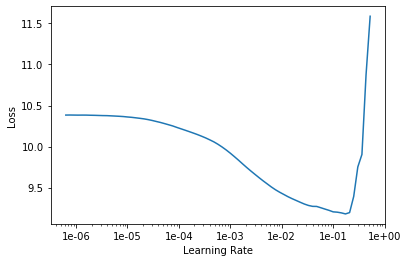

In [22]:
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(20, 1e-3, moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy', name='model')])

epoch,train_loss,valid_loss,accuracy,time
0,6.046154,5.969279,0.214419,19:43
1,5.246222,5.162740,0.277931,19:41
2,4.646038,4.587741,0.320916,19:40
3,4.321971,4.293795,0.342960,19:40
4,4.119202,4.163072,0.349948,19:39
5,4.131173,4.053243,0.358012,19:39
6,3.941661,3.905173,0.370526,19:39
7,3.922519,3.796391,0.381385,19:41
8,3.752540,3.706470,0.392006,19:43
9,3.590728,3.583608,0.406611,19:42


Better model found at epoch 0 with accuracy value: 0.21441875398159027.
Better model found at epoch 1 with accuracy value: 0.27793118357658386.
Better model found at epoch 2 with accuracy value: 0.32091566920280457.
Better model found at epoch 3 with accuracy value: 0.3429602384567261.
Better model found at epoch 4 with accuracy value: 0.34994783997535706.
Better model found at epoch 5 with accuracy value: 0.35801249742507935.
Better model found at epoch 6 with accuracy value: 0.37052613496780396.
Better model found at epoch 7 with accuracy value: 0.38138526678085327.
Better model found at epoch 8 with accuracy value: 0.39200618863105774.
Better model found at epoch 9 with accuracy value: 0.4066111445426941.
Better model found at epoch 10 with accuracy value: 0.4223254323005676.
Better model found at epoch 11 with accuracy value: 0.43931496143341064.
Better model found at epoch 12 with accuracy value: 0.45444634556770325.
Better model found at epoch 13 with accuracy value: 0.4701048433

In [24]:
TEXT = "तसेच टायगर कॅपिटल"
N_WORDS = 40
N_SENTENCES = 2

In [30]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.9) for _ in range(N_SENTENCES)))

तसेच टायगर कॅपिटल ▁ही ▁अमेरिकेत ▁मेजर ▁लीग ▁बेसबॉल ▁या ▁संघटने तील ▁एक ▁बेसबॉल ▁संघ ▁आहे . ▁हा ▁संघ ▁वॉशिंग्टन ▁ ँ ▁ क्यू अस ▁शहराजवळ ▁स्थित ▁आहे . ▁याचे ▁घर चे ▁सामने ▁विकून ▁विकून ▁येणारी ▁विक्री ▁विक्री ▁युनिव्हर्सिटी तून ही ▁केली ▁जात ▁नाही
तसेच टायगर कॅपिटल ▁हा ▁२६ ▁ऑक्टोबर ▁२०१० ▁पासून ▁विश्वासू ▁वंशाचे ▁एक ▁प्रकार ▁आहे . ▁या ▁दुर चित्र धी वर ▁वर्ल्ड ▁व ेन ▁व ▁ग िंग ▁या ▁दोन ▁अ विचार ी ▁सहकार्याने ▁श ॅग मधील ▁सुट्टी चा ▁उच्चांक ▁चालू ▁झाला . ▁ई थ िक


In [31]:
np.exp(2.857645)

17.42045342368867

In [32]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [33]:
# Generating embedding vectors for visualization

In [34]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-marathi/language-model')

In [15]:
# defaults.device = torch.device('cpu')

In [16]:
# learn = load_learner(path / 'MarathiDataset/')

In [35]:
encoder = get_model(learn.model)[0]

In [36]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([30000, 410])

In [37]:
embeddings = encoder.state_dict()['encoder.weight']

In [38]:
embeddings = np.array(embeddings)

In [39]:
embeddings[0].shape

(410,)

In [40]:
df = pd.DataFrame(embeddings)

In [41]:
df.shape

(30000, 410)

In [42]:
df.to_csv('embeddings_transformer.tsv', sep='\t', index=False, header=False)

In [43]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,400,401,402,403,404,405,406,407,408,409
0,-0.010937,0.113969,0.147530,-0.121011,-0.278890,-0.229895,0.030712,-0.257502,0.031346,0.064200,...,-0.134024,0.036281,0.020691,-0.273533,0.060012,0.151923,-0.245915,0.319201,0.240032,0.149429
1,0.295039,-0.018878,0.072087,0.047736,-0.206541,0.199635,-0.135650,-0.045816,-0.195255,-0.088934,...,0.003693,0.101281,0.030086,0.114028,0.121945,-0.025101,0.056296,-0.104296,0.199662,0.024636
2,0.300438,-0.021809,0.069141,0.050555,-0.206079,0.194410,-0.131522,-0.045516,-0.199033,-0.078396,...,0.006615,0.102489,0.030537,0.116891,0.122554,-0.025217,0.065190,-0.098409,0.209584,0.019984
3,0.309477,0.084436,0.105854,0.014735,-0.212537,-0.559150,-0.508897,0.101343,0.247154,0.137923,...,0.141037,-0.247002,0.350776,0.132599,0.144243,-0.103490,-0.531618,-1.074541,0.289434,0.028357
4,-0.205207,0.317478,0.022261,-0.071201,-0.112540,-0.089981,-0.029354,0.013353,-0.082606,-0.297414,...,-0.095006,-0.032324,0.174386,-0.102697,0.104492,0.034446,-0.277193,-0.300818,-0.232282,0.034038


In [44]:
df2 = pd.DataFrame(itos)

In [45]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,.
4,▁


In [46]:
df2.shape

(30000, 1)

In [47]:
df2.to_csv('embeddings_transformer_metadata.tsv', sep='\t', index=False, header=False)

In [48]:
encoder.state_dict()['encoder.weight'][1]

tensor([ 0.2950, -0.0189,  0.0721,  0.0477, -0.2065,  0.1996, -0.1357, -0.0458,
        -0.1953, -0.0889,  0.0342,  0.0526,  0.0017, -0.2536,  0.1059, -0.1432,
        -0.2187,  0.0756, -0.0183,  0.0765,  0.0174,  0.0833, -0.0759,  0.2628,
        -0.1734, -0.0598, -0.1775,  0.0486,  0.1361, -0.2029, -0.1878, -0.1599,
        -0.1213,  0.0983, -0.0728,  0.1632,  0.0142,  0.0435,  0.0396, -0.1823,
        -0.0212,  0.0931,  0.2087, -0.0341, -0.3015,  0.2613,  0.0362, -0.1587,
         0.0619,  0.0293,  0.1595,  0.2002,  0.1558,  0.0987, -0.1003,  0.1076,
        -0.1100,  0.0070,  0.0303, -0.2286, -0.2683,  0.0429, -0.1596,  0.3389,
         0.1505, -0.1421, -0.0898,  0.0534, -0.0639, -0.4874,  0.2601, -0.1792,
        -0.1144, -0.1197,  0.1806,  0.0877,  0.2033,  0.1452,  0.0564,  0.3800,
        -0.1298, -0.1060, -0.1858,  0.0663,  0.0331,  0.2009, -0.0947,  0.0275,
        -0.0091,  0.0473, -0.0577, -0.2623,  0.0455, -0.1023,  0.0337,  0.0830,
        -0.1576, -0.0552,  0.1055, -0.04